In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import networkx as nx

In [3]:
# source: https://www.kaggle.com/kimjihoo/coronavirusdataset#PatientInfo.csv
df = pd.read_csv('../coronavirusdataset_southKorea/PatientInfo.csv')

In [4]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
# percentage of completeness of 'infected_by'
len(df[~df['infected_by'].isna()])/len(df)

0.21145175834084762

#### cleaning 'infected_by'

In [18]:
df['infected_by'] = df.apply(lambda x: str(x['infected_by'])[:-2], axis=1)
df['patient_id'] = df['patient_id'].astype(str)

### Selecting only targeted rows (not null infected_by values)

In [10]:
net = df[df['infected_by']!='n']

In [11]:
len(net)

469

In [12]:
net['infected_by'].value_counts().quantile([0,0.25,0.5,0.75,1])

0.00     1.0
0.25     1.0
0.50     1.0
0.75     2.0
1.00    44.0
Name: infected_by, dtype: float64

In [13]:
np.mean(net['infected_by'].value_counts())

2.2766990291262137

In [14]:
pd.to_datetime(net['confirmed_date']).max()

Timestamp('2020-03-18 00:00:00')

In [15]:
sources = list(net['infected_by'].unique())

In [16]:
infected_ppl = list(net['patient_id'].unique())

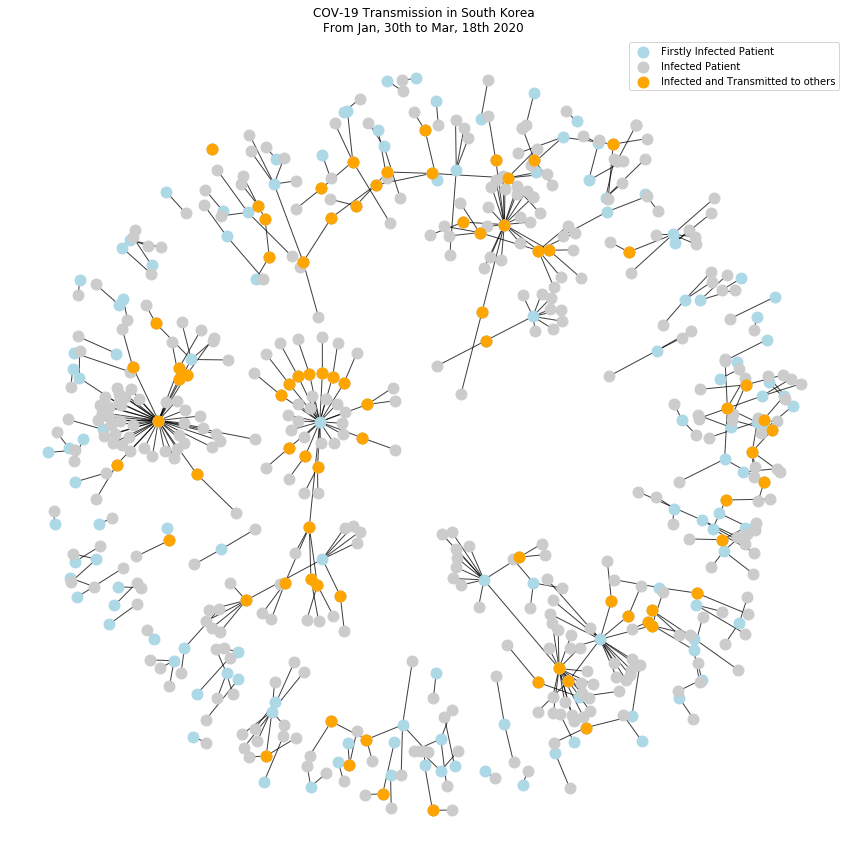

In [17]:
plt.figure(figsize=(15,15))
node_size =120
# create the graph
g=nx.from_pandas_edgelist(net, 'patient_id','infected_by')

# create a layout for nodes
layout = nx.spring_layout(g,iterations=50,k=0.105)



# VIRUS SOURCES
# create source sizes
#source_sizes = [g.degree(source) * 80 for source in sources]
# draw sources
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=sources, 
                       node_size=node_size, 
                       node_color='lightblue')

# VIRUS INFECTED
# draw infected
nx.draw_networkx_nodes(g, layout, nodelist=infected_ppl, node_color='#cccccc', node_size=node_size)
# infected people infecting others
infected_then_infect_others = [person for person in infected_ppl if g.degree(person) > 1]

# draw infected by infected ppl
nx.draw_networkx_nodes(g, layout, nodelist=infected_then_infect_others, node_color='orange', node_size=node_size)


nx.draw_networkx_edges(g, layout, width=1, edge_color="black", alpha=0.75)

# labelling

# 4. Turn off the axis 
plt.axis('off')

plt.title("COV-19 Transmission in South Korea \nFrom Jan, 30th to Mar, 18th 2020 ")
plt.legend(labels=['Firstly Infected Patient', 'Infected Patient','Infected and Transmitted to others'])

# 5. Tell matplotlib to show it
plt.show()

### Calculating Centrality (detecting the most important node)

In [21]:
# Knowing the node with highest 'Degree Centrality'
sorted(nx.degree_centrality(g).items(), key=lambda x:x[1], reverse=True)[:3]

[('2000000205', 0.07588532883642496),
 ('4100000008', 0.045531197301854974),
 ('4100000006', 0.03541315345699831)]

In [22]:
# Highest 'Closeness Centrality'
sorted(nx.closeness_centrality(g).items(), key=lambda x:x[1], reverse=True)[:3]

[('2000000205', 0.07777006249380021),
 ('4100000008', 0.05415027168821436),
 ('1000000138', 0.04679968362458774)]